# Name : Rohit Shenvi Diwadkar

# I. Overview

__This assignment is about classification of labels using deep learning. In Deep learning we use lots of python library for the above objective , for example : tensorflow or keras.__

__I used keras for implementation of deep learning on bank marketing data. In this we used sequential model of keras.__





### Data Visualization -- Classification

__So for Classification I chose " Google, Amazon and more Employee Reviews" dataset from UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/bank+marketing). The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.__

There are 17 variables and in total 45211 records . The folowing are the attribute Information:

Input variables:

1 - age (numeric) 

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day: last contact day.

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no').

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - y : has the client subscribed a term deposit? (binary: 'yes','no')

17 - Balance : balance in the bank account (numeric)

__Below here we read the data and load it as a dataframe.__

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from datetime import datetime
from PIL import Image
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import RMSprop
from keras.datasets import mnist
from keras.utils import np_utils

In [0]:
df =pd.read_csv('bank-full.csv')

In [0]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


__As there are no missing values or null values the data is already preprocessed. Now we will be checking for correlation between the variables.__

__In the below section we are calculating correlation between numerical variables just to see the correaltion between them. Correlation matrix is the measurement of the relation between two or more variables.__

In [0]:
corr = df.corr()
corr.style.background_gradient()

,age,balance,day,duration,campaign,pdays,previous
age,1,0.0977827,-0.00912005,-0.00464843,0.00476031,-0.023758,0.00128832
balance,0.0977827,1,0.00450259,0.0215604,-0.0145783,0.00343532,0.0166736
day,-0.00912005,0.00450259,1,-0.0302063,0.16249,-0.0930441,-0.0517105
duration,-0.00464843,0.0215604,-0.0302063,1,-0.0845695,-0.00156477,0.00120306
campaign,0.00476031,-0.0145783,0.16249,-0.0845695,1,-0.0886277,-0.0328553
pdays,-0.023758,0.00343532,-0.0930441,-0.00156477,-0.0886277,1,0.45482
previous,0.00128832,0.0166736,-0.0517105,0.00120306,-0.0328553,0.45482,1


__We can see that the varibales pdays<-->previous are slightly correlated to each other.__

In [0]:
a= df.groupby(['marital','loan']).count()

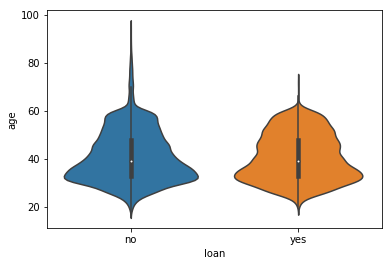

In [0]:
sns.violinplot(df['loan'],df['age'])

__From the above visualization, we can say that the median age of people taken loan is 38-39 yrs.__

__The major people with age group 20-60 has already taken loan.__

__There are still some people of age of nearly 90+ has not taken loan till date.__

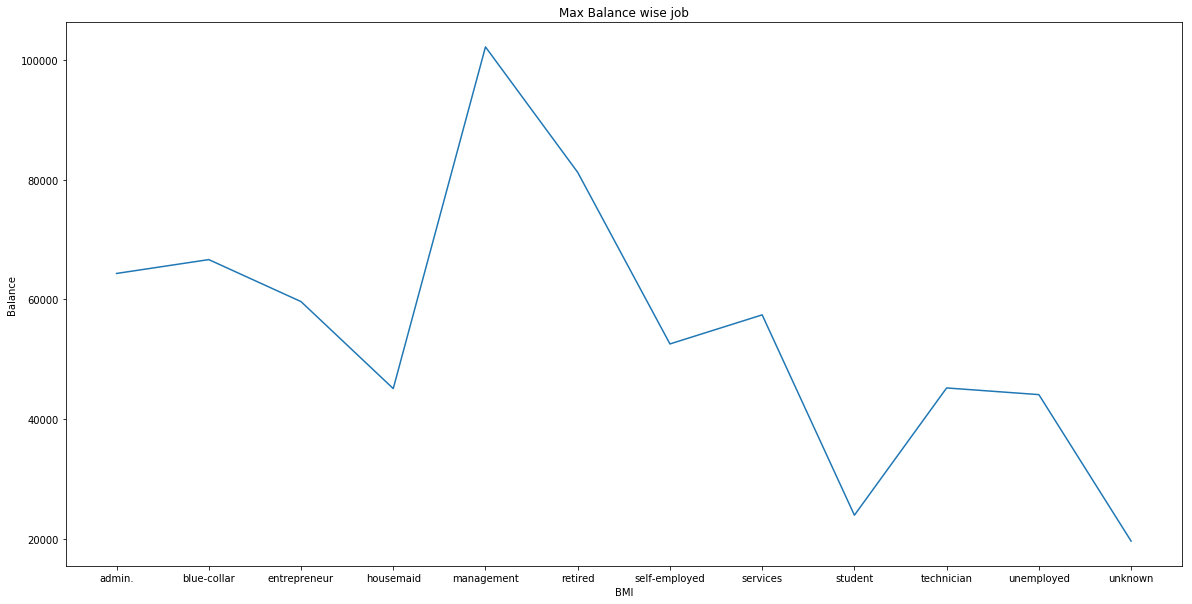

In [0]:
var = df.groupby('job').balance.max()
fig = plt.figure()
fig.set_size_inches(20,10)
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('BMI')
ax1.set_ylabel('Balance')
ax1.set_title("Max Balance wise job")
plt.plot(var)

__From the above figure we can see that the people who are in the management job have the highest balance in their bank account followed by the retired people.__

__The people whose job are unknown or a student have the least balance in their bank account.__

In [0]:
b = df.groupby('month').campaign.count()

Text(0, 0.5, 'Total Campaigns')

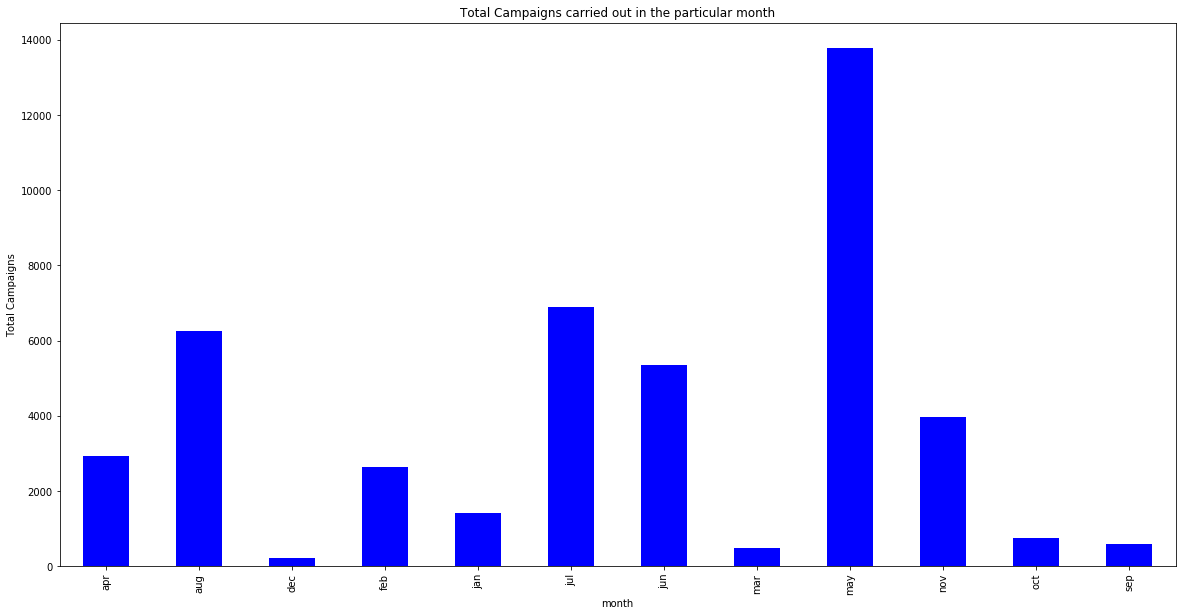

In [0]:
fig = plt.figure()
fig.set_size_inches(20,10)
ax1 = fig.add_subplot(1,1,1)
ax1.set_title("Total Campaigns carried out in the particular month")
b.plot(kind='bar',stacked=True,  color=['blue'], grid=False)
plt.ylabel('Total Campaigns')

__In the above figure, we can see that almost 13k+ campaigns were carried out in the month of May followed by July.__

__The least campaigns were carried out in the month of December.__

__In the month of August and June the avaerage number of campaigns were ran.__

In [0]:
a=df.loc[df.age<18,['age']]
print(a)
b=df.loc[(df.age >= 18) & (df.age < 60),['age']]
print(b)
c=df.loc[df.age>=60,['age']]
print(c)
d=pd.concat([a,b,c],keys=["0-17","18-59","60+"])
e=d.loc[:,['age']]
print(e)

Empty DataFrame
Columns: [age]
Index: []
       age
0       58
1       44
2       33
3       47
4       33
5       35
6       28
7       42
8       58
9       43
10      41
11      29
12      53
13      58
14      57
15      51
16      45
17      57
19      33
20      28
21      56
22      32
23      25
24      40
25      44
26      39
27      52
28      46
29      36
30      57
...    ...
45171   33
45172   30
45173   36
45175   38
45176   54
45177   36
45178   34
45179   34
45181   46
45182   34
45186   59
45187   32
45188   29
45189   25
45190   32
45192   29
45193   28
45194   59
45196   25
45197   36
45198   37
45199   34
45200   38
45201   53
45202   34
45203   23
45205   25
45206   51
45209   57
45210   37

[43427 rows x 1 columns]
       age
18      60
32      60
42      60
66      60
92      60
93      60
97      60
157     60
174     60
199     61
390     60
508     60
575     61
668     60
725     60
976     60
1037    60
1233    61
1260    60
1379    60
1427    60
1470    6

In [0]:
df['groups'] = pd.cut(df['age'],bins=[17,31,59,120], labels=["17-30","31-59","60+"])
df1 = df.groupby(['age', 'groups']).size().unstack(fill_value=0)
print (df1)

groups  17-30  31-59  60+
age                      
18         12      0    0
19         35      0    0
20         50      0    0
21         79      0    0
22        129      0    0
23        202      0    0
24        302      0    0
25        527      0    0
26        805      0    0
27        909      0    0
28       1038      0    0
29       1185      0    0
30       1757      0    0
31       1996      0    0
32          0   2085    0
33          0   1972    0
34          0   1930    0
35          0   1894    0
36          0   1806    0
37          0   1696    0
38          0   1466    0
39          0   1487    0
40          0   1355    0
41          0   1291    0
42          0   1242    0
43          0   1161    0
44          0   1136    0
45          0   1216    0
46          0   1175    0
47          0   1088    0
..        ...    ...  ...
65          0      0   59
66          0      0   63
67          0      0   54
68          0      0   36
69          0      0   44
70          

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f102e767cf8>,
      dtype=object)

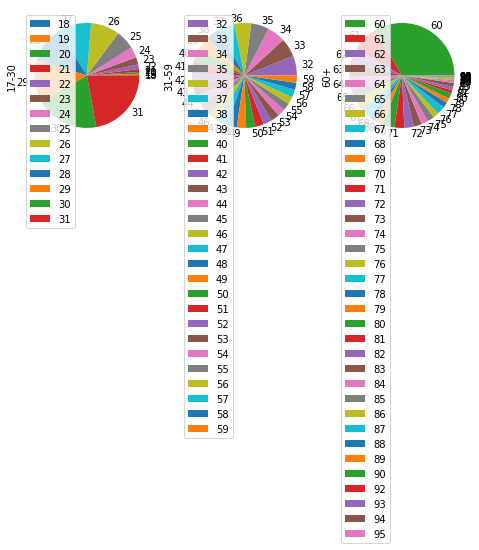

In [0]:
df1.plot.pie(subplots=True,figsize=(8, 3))

In [0]:
a = df.groupby('groups').size()

print (a)

groups
17-30     9026
31-59    34401
60+       1784
dtype: int64


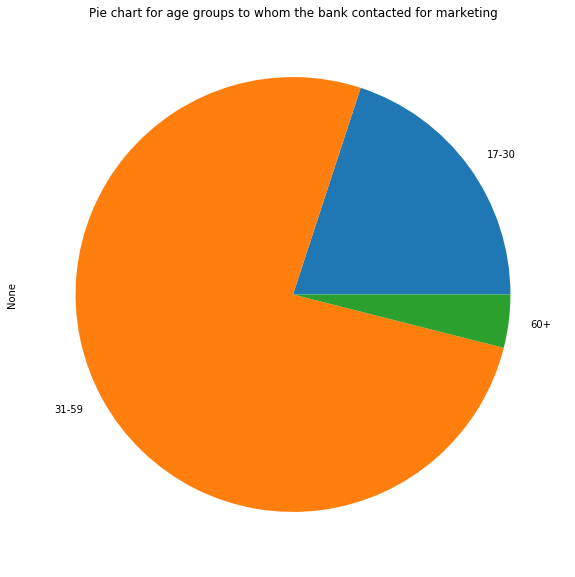

In [0]:
a.plot.pie(title='Pie chart for age groups to whom the bank contacted for marketing',figsize=(10,10))

__From this pie chart , we can say that the bank contacted majority of the people whose age are between 31-59 i.e working population for marketing or asking for loan.__

__The least people from age group 60+ were least contacted by the bank.__

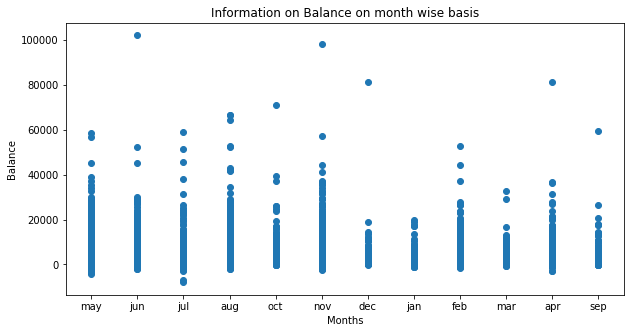

In [0]:
fig = plt.figure()
fig.set_size_inches(10,5)
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Months')
ax.set_ylabel('Balance')
ax.set_title("Information on Balance on month wise basis")
ax.scatter(df['month'],df['balance']) # Added third variable income as size of the bubble
plt.show()

__From this scatter plot we can see that in the month of may and nov the balances of the people in the bank was majorly between negative balance and 40K.__

__The highest balance was recorded in the month of Jun i.e 10K+ follwoed by in the month of November.__

__The lowest balance was recorded in the month of July.__

__There was no negative balance in the month of December and March .__

In [0]:
def cat_to_numeric(x):
    if x=='yes':
        return 1
    if x=='no':
        return 0

In [0]:
df['default1'] = df['default'].apply(cat_to_numeric) 

In [0]:
df['housing1'] = df['housing'].apply(cat_to_numeric)

In [0]:
df['loan1'] = df['loan'].apply(cat_to_numeric)

# Method and Results

In this section I will be talking about usage of Keras and how it is implemented.

The below code is about selecting best features from the dataset.


In [0]:
X = df.filter(['campaign','previous','duration','balance','default1','housing1','loan1'], axis=1)

In [0]:
T = df.filter(['y'], axis=1)

In [0]:
T['y'] = [0 if y == 'no' else 1 for y in T['y'].values ]

__The below code is about splitting up the features and labels from the dataset by using train_test_split().__

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size = 0.20)

__Here I am using sequential model for deep network. 
Here I can create a Sequential model by passing a list of layer or its instances to the object and also add layers via the .add() method.__

__Add layers with droupout can be used as it is randomly selecting nodes to be dropped-out with a given probability each weight update cycle.__

__As the model needs to know what input shape it should expect , we provide more detail  in first layer.
Dense i.e 2D layer which gives the details of their input shape via the argument input_dim.
We take activation function as Rectified Linear Unit (relu) which returns a tensor.__
 
__For the last layer we use activation function as 'sigmoid'  - activation function in terms of underlying gate structured in co-relation to Neurons firing in Neural Networks. It is mainly used in logistic function case.__



## *First Network* *Structure*

__The below model has 7  layers with below mentioned neurons. We took 7 layers to check if we take more number of input data can the network sheld good output with less loss and more accuracy, Also we know if we use less then 3 layer the network is nt called as deep network , It will be a normal neural network__

In [0]:
model = Sequential()
model.add(Dense(2, activation='relu', input_dim=X_train.shape[1]))
#model.add(Dropout(0.5))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 2)                 16        
_________________________________________________________________
dense_9 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_10 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_11 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_12 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_13 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 21        
Total para

The below line of code represnts the configuration of model for training purposes.

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

__The below line of code explains us about training the model for a given number of epochs i.e. iterations on a particular dataset. I used batch_size to specify the number of samples per gradient will update.I also used validation split which works as cross validation and split the data accordingly.__

In [0]:
history = model.fit(X_train,T_train, nb_epoch=20, batch_size=500,validation_split=0.2, validation_data=(None))

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 28934 samples, validate on 7234 samples
Epoch 1/20
28934/28934 [==============================] - 1s 32us/step - loss: 0.6455 - acc: 0.8456 - val_loss: 0.5245 - val_acc: 0.8778
Epoch 2/20
28934/28934 [==============================] - 0s 6us/step - loss: 0.5379 - acc: 0.8764 - val_loss: 0.5370 - val_acc: 0.8674
Epoch 3/20
28934/28934 [==============================] - 0s 6us/step - loss: 0.4926 - acc: 0.8682 - val_loss: 0.4731 - val_acc: 0.8778
Epoch 4/20
28934/28934 [==============================] - 0s 6us/step - loss: 0.4304 - acc: 0.8688 - val_loss: 0.4559 - val_acc: 0.8626
Epoch 5/20
28934/28934 [==============================] - 0s 6us/step - loss: 0.3654 - acc: 0.8767 - val_loss: 0.3366 - val_acc: 0.8778
Epoch 6/20
28934/28934 [==============================] - 0s 6us/step - loss: 0.3414 - acc: 0.8771 - val_loss: 0.3150 - val_acc: 0.8828
Epoch 7/20
28934/28934 [==============================] - 0s 6us/step - loss: 0.3345 - acc: 0.8793 - val_loss: 0.3250 - val_acc: 0.877

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [0]:
history_dict = history.history

__The below plot is about the loss values__

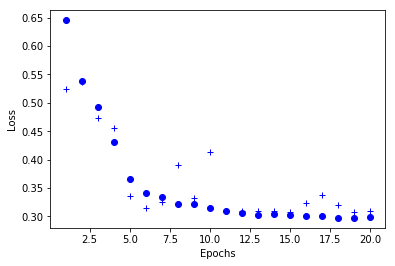

In [0]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

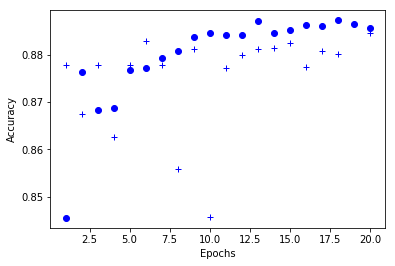

In [0]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

__The network starts overfitting around 9 epochs. We can train a new network for 9 epochs and then evaluate its performance on the test data.__

__The below code is about testing the model and evaluating.__

In [0]:
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=X.shape[1]))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_test, T_test, nb_epoch=20, batch_size=512, validation_split=0.2,validation_data=(None))

results = model.evaluate(X_test, T_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 7234 samples, validate on 1809 samples
Epoch 1/20
7234/7234 [==============================] - 1s 86us/step - loss: 6.4038 - acc: 0.4260 - val_loss: 1.1687 - val_acc: 0.8756
Epoch 2/20
7234/7234 [==============================] - 0s 7us/step - loss: 0.9043 - acc: 0.8455 - val_loss: 0.9638 - val_acc: 0.7347
Epoch 3/20
7234/7234 [==============================] - 0s 6us/step - loss: 1.0135 - acc: 0.8202 - val_loss: 0.8217 - val_acc: 0.8524
Epoch 4/20
7234/7234 [==============================] - 0s 6us/step - loss: 0.8177 - acc: 0.8283 - val_loss: 1.2249 - val_acc: 0.8811
Epoch 5/20
7234/7234 [==============================] - 0s 7us/step - loss: 0.9048 - acc: 0.8464 - val_loss: 1.0236 - val_acc: 0.8811
Epoch 6/20
7234/7234 [==============================] - 0s 6us/step - loss: 0.8740 - acc: 0.8481 - val_loss: 0.9624 - val_acc: 0.8811
Epoch 7/20
7234/7234 [==============================] - 0s 7us/step - loss: 0.7106 - acc: 0.8698 - val_loss: 0.6278 - val_acc: 0.8811
Epoch 8/20
72

In [0]:
results

[0.719695624281687, 0.8833351763465639]

__So this network gives me the accuracy of 88.3%__

In [0]:
pred = model.predict_classes(X_test)
pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [0]:
pretty_confusion_matrix(T_test, pred, labels=['Yes', 'No'])

,Predicted Yes,Predicted No
Yes,7983,4
No,1051,5


## *Second Network Structure*

__The below model has 6  layers with below mentioned neurons. We took 6 layers to check if we take more number of input data can the network sheld good output with less loss and more accuracy plus I wanted to check what changes the most when we reduce the layer. Also we know if we use less then 3 layer the network is nt called as deep network , It will be a normal neural network. The assignment also requries atleats 5 layers.__

In [0]:
model = Sequential()
model.add(Dense(2, activation='relu', input_dim=X_train.shape[1]))
#model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 2)                 16        
_________________________________________________________________
dense_50 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_51 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_52 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_53 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 21        
Total params: 717
Trainable params: 717
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(X_train,T_train, nb_epoch=20, batch_size=500,validation_split=0.2, validation_data=(None))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 28934 samples, validate on 7234 samples
Epoch 1/20
28934/28934 [==============================] - 1s 29us/step - loss: 0.7200 - acc: 0.8310 - val_loss: 0.6084 - val_acc: 0.8778
Epoch 2/20
28934/28934 [==============================] - 0s 5us/step - loss: 0.5465 - acc: 0.8740 - val_loss: 0.5114 - val_acc: 0.8706
Epoch 3/20
28934/28934 [==============================] - 0s 5us/step - loss: 0.5062 - acc: 0.8750 - val_loss: 0.5796 - val_acc: 0.8778
Epoch 4/20
28934/28934 [==============================] - 0s 5us/step - loss: 0.4549 - acc: 0.8769 - val_loss: 0.4036 - val_acc: 0.8778
Epoch 5/20
28934/28934 [==============================] - 0s 5us/step - loss: 0.4158 - acc: 0.8795 - val_loss: 0.3710 - val_acc: 0.8770
Epoch 6/20
28934/28934 [==============================] - 0s 4us/step - loss: 0.3915 - acc: 0.8796 - val_loss: 0.4032 - val_acc: 0.8778
Epoch 7/20
28934/28934 [==============================] - 0s 5us/step - loss: 0.3684 - acc: 0.8822 - val_loss: 0.3516 - val_acc: 0.877

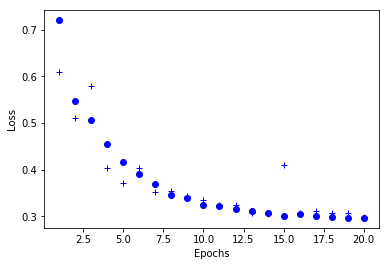

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline  
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

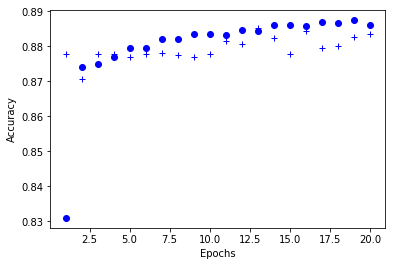

In [0]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

__The network starts overfitting around 11 epochs. We can train a new network for 11 epochs and then evaluate its performance on the test data.__

In [0]:
model = Sequential()
model.add(Dense(2, activation='relu', input_dim=X.shape[1]))
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_test, T_test, nb_epoch=20, batch_size=512, validation_split=0.2,validation_data=(None))

results = model.evaluate(X_test, T_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 7234 samples, validate on 1809 samples
Epoch 1/20
7234/7234 [==============================] - 1s 139us/step - loss: 0.8623 - acc: 0.7790 - val_loss: 0.6720 - val_acc: 0.8695
Epoch 2/20
7234/7234 [==============================] - 0s 5us/step - loss: 0.6301 - acc: 0.8611 - val_loss: 0.6229 - val_acc: 0.8811
Epoch 3/20
7234/7234 [==============================] - 0s 5us/step - loss: 0.5830 - acc: 0.8790 - val_loss: 0.5981 - val_acc: 0.8811
Epoch 4/20
7234/7234 [==============================] - 0s 5us/step - loss: 0.5622 - acc: 0.8771 - val_loss: 0.5669 - val_acc: 0.8811
Epoch 5/20
7234/7234 [==============================] - 0s 5us/step - loss: 0.5312 - acc: 0.8725 - val_loss: 0.4808 - val_acc: 0.8811
Epoch 6/20
7234/7234 [==============================] - 0s 5us/step - loss: 0.5121 - acc: 0.8730 - val_loss: 0.4724 - val_acc: 0.8811
Epoch 7/20
7234/7234 [==============================] - 0s 5us/step - loss: 0.5008 - acc: 0.8717 - val_loss: 0.5478 - val_acc: 0.8811
Epoch 8/20
7

In [0]:
results

[0.4712759609324181, 0.8832245935753595]

__So this network gives me the accuracy of 88.77% more then the previous structure__

In [0]:
pred = model.predict_classes(X_test)
pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
pretty_confusion_matrix(T_test, pred, labels=['Yes', 'No'])

,Predicted Yes,Predicted No
Yes,7987,0
No,1056,0


## *Third Network Structure*



__The below model has 12  layers with below mentioned neurons. We took 12 layers to check if we take more number of input data can the network sheld good output with less loss and more accuracy plus I wanted to check what changes the most when we increases the layers. Also we know if we use less then 3 layer the network is nt called as deep network , It will be a normal neural network. The assignment also requries atleats 5 layers.__

In [0]:
model = Sequential()
model.add(Dense(2, activation='relu', input_dim=X_train.shape[1]))
#model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 2)                 16        
_________________________________________________________________
dense_74 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_75 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_76 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_77 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_78 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_79 (Dense)             (None, 20)                420       
__________

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(X_train,T_train, nb_epoch=20, batch_size=500,validation_split=0.2, validation_data=(None))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 28934 samples, validate on 7234 samples
Epoch 1/20
28934/28934 [==============================] - 1s 51us/step - loss: 0.5310 - acc: 0.8801 - val_loss: 0.3843 - val_acc: 0.8778
Epoch 2/20
28934/28934 [==============================] - 0s 8us/step - loss: 0.3589 - acc: 0.8843 - val_loss: 0.3603 - val_acc: 0.8778
Epoch 3/20
28934/28934 [==============================] - 0s 8us/step - loss: 0.3512 - acc: 0.8842 - val_loss: 0.3580 - val_acc: 0.8778
Epoch 4/20
28934/28934 [==============================] - 0s 8us/step - loss: 0.3486 - acc: 0.8844 - val_loss: 0.3565 - val_acc: 0.8779
Epoch 5/20
28934/28934 [==============================] - 0s 8us/step - loss: 0.3464 - acc: 0.8840 - val_loss: 0.3553 - val_acc: 0.8778
Epoch 6/20
28934/28934 [==============================] - 0s 8us/step - loss: 0.3449 - acc: 0.8844 - val_loss: 0.3626 - val_acc: 0.8778
Epoch 7/20
28934/28934 [==============================] - 0s 8us/step - loss: 0.3419 - acc: 0.8845 - val_loss: 0.3562 - val_acc: 0.880

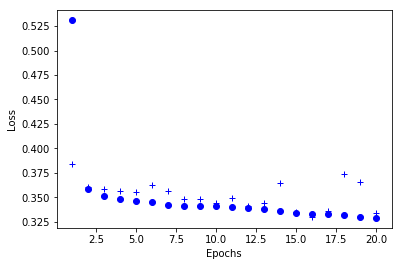

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline  
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

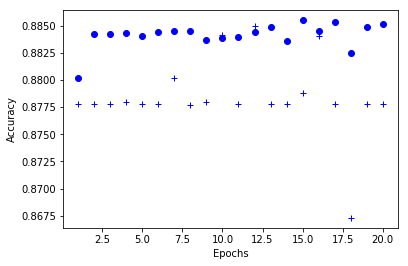

In [0]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

__The network starts overfitting in the middle of epochs. We can train a new network for random epochs and then evaluate its performance on the test data.__

In [0]:
model = Sequential()
model.add(Dense(2, activation='relu', input_dim=X.shape[1]))
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_test, T_test, nb_epoch=20, batch_size=512, validation_split=0.2,validation_data=(None))

results = model.evaluate(X_test, T_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 7234 samples, validate on 1809 samples
Epoch 1/20
7234/7234 [==============================] - 2s 240us/step - loss: 1.0093 - acc: 0.7752 - val_loss: 0.9480 - val_acc: 0.8811
Epoch 2/20
7234/7234 [==============================] - 0s 9us/step - loss: 0.7918 - acc: 0.8448 - val_loss: 0.6537 - val_acc: 0.8811
Epoch 3/20
7234/7234 [==============================] - 0s 8us/step - loss: 0.7112 - acc: 0.8627 - val_loss: 0.7500 - val_acc: 0.8811
Epoch 4/20
7234/7234 [==============================] - 0s 10us/step - loss: 0.7268 - acc: 0.8526 - val_loss: 0.6000 - val_acc: 0.8811
Epoch 5/20
7234/7234 [==============================] - 0s 10us/step - loss: 0.6307 - acc: 0.8699 - val_loss: 0.8437 - val_acc: 0.5600
Epoch 6/20
7234/7234 [==============================] - 0s 8us/step - loss: 0.6295 - acc: 0.8578 - val_loss: 0.7893 - val_acc: 0.8811
Epoch 7/20
7234/7234 [==============================] - 0s 9us/step - loss: 0.6051 - acc: 0.8672 - val_loss: 0.5593 - val_acc: 0.8811
Epoch 8/20

In [0]:
results

[0.3741212925011376, 0.8832245935753595]

__So this network gives me the accuracy of 88.32% less then the previous structure__

In [0]:
pred = model.predict_classes(X_test)
pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
pretty_confusion_matrix(T_test, pred, labels=['Yes', 'No'])

,Predicted Yes,Predicted No
Yes,7987,0
No,1056,0


## Choice of Network Structure

__So if we go through the above scenarios, we can see that if we change the number of layer in the network structure , the classification and accuracy changes accordingly. Less and precise number of neurons and layers can yield you good results. Pruning also describes a set of techniques to trim network (by nodes not layers) to improve computational performance. The gist of these techniques is removing nodes from the network during training by identifying those nodes which if removed from the network, would not noticeably affect network performance.__

## Conclusion

__Deep Learning is very important part of machine learning and artificial intelligence which specially used in software agents and machines are made to ascertain the ideal output in a specific deep network with the aim of maximizing its performance.__

From this assignments I learned alot and faced lot of challenges:

1. The number of network confused alot to which there was some errors arised while designing the model and the data given as input.

2. It was very difficult to set the epochs which made difficult to calculate the accuracy and plot it.

3. I learned alot about Deep learning through this assignment and about correct network structure selection by experimenting or pruning.

4. Also learned about the tensorflow and keras.